In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('C:/Users/ASUS/Desktop/python_datasets/imarticus/Pranjal_Sir/CreditRisk.csv')

In [3]:
file.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
file.drop('Loan_ID', axis=1, inplace=True)

In [5]:
file.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
file.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
file.isna().sum()[file.isna().sum()>0]

Series([], dtype: int64)

In [38]:
file.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [35]:
file.Married.fillna('Yes', inplace=True)
file.Dependents.fillna(0, inplace=True)
file.Married.fillna('No', inplace=True)
file.Loan_Amount_Term.fillna(360, inplace=True)
file.Credit_History.fillna(1, inplace=True)
file.LoanAmount.fillna(142, inplace=True)

In [39]:
file.Self_Employed.fillna('No', inplace=True)

In [93]:
file.replace({'Y':1,'N':0}, inplace=True) 

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
train, test = train_test_split(file, train_size=0.8, random_state=0)

In [96]:
train_x = train.iloc[:,0:-1:]
train_y = train.iloc[:,-1::]
test_x = test.iloc[:,0:-1:]
test_y = test.iloc[:,-1::]

In [97]:
train_x=pd.get_dummies(train_x, drop_first=True)
test_x=pd.get_dummies(test_x, drop_first=True)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logreg = LogisticRegression()

In [100]:
logreg.fit(train_x, train_y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [104]:
pred_y=logreg.predict(test_x)

In [122]:
pred_prob=logreg.predict_proba(test_x)[:,1]

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [105]:
confusion_matrix(test_y,pred_y)

array([[ 24,  25],
       [  2, 146]], dtype=int64)

In [118]:
accuracy_score(test_y, pred_y)

0.8629441624365483

In [119]:
recall_score(test_y, pred_y)

0.9864864864864865

In [120]:
roc_auc_score(test_y, pred_y)

0.7381412024269167

In [124]:
fpr, tpr, thres = roc_curve(test_y, pred_prob)

In [125]:
fpr

array([0.        , 0.        , 0.        , 0.04081633, 0.04081633,
       0.06122449, 0.06122449, 0.08163265, 0.08163265, 0.10204082,
       0.10204082, 0.12244898, 0.12244898, 0.14285714, 0.14285714,
       0.16326531, 0.16326531, 0.20408163, 0.20408163, 0.24489796,
       0.24489796, 0.26530612, 0.26530612, 0.28571429, 0.28571429,
       0.30612245, 0.30612245, 0.36734694, 0.36734694, 0.3877551 ,
       0.3877551 , 0.40816327, 0.40816327, 0.42857143, 0.42857143,
       0.44897959, 0.44897959, 0.51020408, 0.51020408, 0.69387755,
       0.69387755, 0.79591837, 0.79591837, 1.        ])

In [126]:
tpr

array([0.        , 0.00675676, 0.03378378, 0.03378378, 0.08108108,
       0.08108108, 0.14189189, 0.14189189, 0.22972973, 0.22972973,
       0.31081081, 0.31081081, 0.43918919, 0.43918919, 0.47972973,
       0.47972973, 0.57432432, 0.57432432, 0.58783784, 0.58783784,
       0.61486486, 0.61486486, 0.64189189, 0.64189189, 0.7027027 ,
       0.7027027 , 0.72297297, 0.72297297, 0.81756757, 0.81756757,
       0.82432432, 0.82432432, 0.85135135, 0.85135135, 0.89864865,
       0.89864865, 0.97972973, 0.97972973, 0.98648649, 0.98648649,
       0.99324324, 0.99324324, 1.        , 1.        ])

In [128]:
thres

array([1.96258472, 0.96258472, 0.94732283, 0.94137224, 0.92904748,
       0.92876343, 0.91625131, 0.91538651, 0.90111758, 0.9002543 ,
       0.88533642, 0.88512343, 0.86636622, 0.86554192, 0.86292455,
       0.86211613, 0.85106568, 0.84839591, 0.84707928, 0.84596489,
       0.84246816, 0.84242304, 0.83907043, 0.83788366, 0.82825073,
       0.82730637, 0.8225787 , 0.81836247, 0.79343005, 0.79234796,
       0.79139407, 0.78160198, 0.76122241, 0.76100641, 0.72137661,
       0.71981271, 0.6662311 , 0.62779767, 0.54937087, 0.18761454,
       0.17129995, 0.12485029, 0.11822405, 0.05697738])

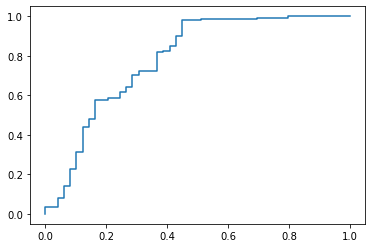

In [129]:
plt.plot(fpr,tpr)